Theta0: 1.6697833358689582
Theta1: 0.9670585613597085
Theta2: 0.9371712271839181
Erreur quadratique moyenne : 0.77022622853241


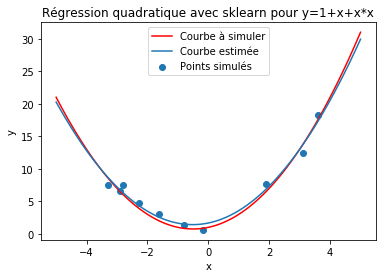

In [2]:
# Régression polynomiale quadratique avec sklearn pour des données simulées quadratiques
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def h_quadratique_univarie(theta,x):
    return theta[0]+theta[1]*x+theta[2]*x**2

# Génération de données avec résidus ~ N(0,1)
m=10 # nombre de lignes de données
theta_simule = (1,1,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*10-5 # m valeurs de x entre -5 et 5
Y = h_quadratique_univarie(theta_simule,X)+np.random.randn(m) # Résidus N(0,1)
plt.scatter(X,Y,label = 'Points simulés') # Pour afficher les données aléatoires simulées

# Pour afficher la courbe du modèle simulé
X_modele = np.arange(-5,5.1,0.1) 
Y_modele = h_quadratique_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Courbe à simuler')

# Régression linéaire avec sklearn sur les données avec colonne x*x
modele = LinearRegression(fit_intercept=True)
X_quadratique = np.hstack((X[:, np.newaxis],(X**2)[:, np.newaxis]))
modele.fit(X_quadratique,Y)
print("Theta0:", modele.intercept_)
print("Theta1:", modele.coef_[0])
print("Theta2:", modele.coef_[1])
print("Erreur quadratique moyenne :", mean_squared_error(modele.predict(X_quadratique),Y))

# Estimer les valeurs pour produire le graphique de la courbe estimée
Y_estime = modele.predict(np.hstack((X_modele[:, np.newaxis],(X_modele**2)[:, np.newaxis])))
plt.plot(X_modele,Y_estime,label='Courbe estimée')

plt.title('Régression quadratique avec sklearn pour y=1+x+x*x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper center')
plt.show()